<a href="https://colab.research.google.com/github/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols as ols
from matplotlib import pyplot as plt
stats.t.ppf(.025,13)

-2.160368656461013

In [90]:
metro=[3,7,25,10,15,6,12,25,15,7]
rural=[48,44,40,38,33,21,20,12,1,18]
stats.ttest_ind(metro, rural, equal_var = False)

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

In [91]:
KARL=[1.186,1.151,1.322,1.339,1.200,1.402,1.365,1.537,1.559]
LEH=[1.061,.992,1.063,1.062,1.065,1.178,1.037,1.086,1.052]
stats.ttest_rel(KARL,LEH)

Ttest_relResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066)

In [92]:
import math
def two_samp_proprortion(p1,p2,n1,n2):
  p_pool = ((p1*n1)+(p2*n2))/(n1+n2)
  x = (p_pool*(1-p_pool)*((1/n1)+(1/n2)))
  s = math.sqrt(x)
  z = (p1-p2)/s
  p_val = 0
  if(z<0):
    p_val = stats.norm.cdf(z)
  else:
    p_val = 1 - stats.norm.cdf(z)
  
  return z,p_val*2


In [93]:
two_samp_proprortion(.27,.19,100,100)

(1.3442056254198995, 0.17888190308175567)

In [94]:
stats.f.ppf(q=1-0.05,dfn = 15, dfd=10)

2.8450165269958436

In [95]:
stats.f.ppf(q=1-0.95,dfn = 15, dfd=10)

0.3931252536255495

In [96]:
X = [3,7,25,10,15,6,12,25,15,7]
Y=[48,44,40,38,33,21,20,12,1,18]
F = np.var(X)/np.var(Y)
dfn = len(X) - 1
dfd = len(Y) - 1
p_value = stats.f.cdf(F,dfn,dfd)
print(p_value)

0.024680183438910465


In [97]:
def samplesize(alfa, beta, mu1, mu2, sigma):
  z1 = -1*stats.norm.ppf(alfa)
  z2 = -1*stats.norm.ppf(beta)
  n = (((z1+z2)**2)*(sigma**2))/((mu1-mu2)**2)
  print(n)

samplesize(0.05,.1,12,12.75,3.2)


155.900083325938


In [98]:
a = [4,3,2]
b = [2,4,6]
c=[2,1,3]
stats.f_oneway(a, b, c)


F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

In [99]:
path = 'https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/oneway.xlsx?raw=true'
data = pd.read_excel(path)

In [100]:
data

,BlackBoard,CasePresentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [101]:
data_new = pd.melt(data.reset_index(), id_vars = ['index'], value_vars=['BlackBoard', 'CasePresentation', 'PPT'])
data_new.columns=['index', 'Treatments', 'value']
data_new

,index,Treatments,value
0,0,BlackBoard,4
1,1,BlackBoard,3
2,2,BlackBoard,2
3,0,CasePresentation,2
4,1,CasePresentation,4
5,2,CasePresentation,6
6,0,PPT,2
7,1,PPT,1
8,2,PPT,3


In [102]:
model=ols('value ~ C(Treatments)', data=data_new).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


In [103]:
path = 'https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Tensile%20strength%20of%20paper.xlsx?raw=true'
data = pd.read_excel(path)
data

,five,ten,fifteen,twenty
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


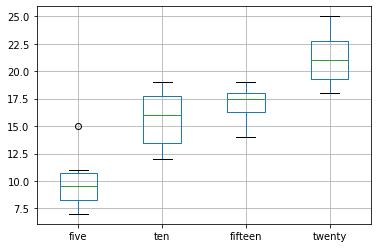

In [106]:
boxplot  = data.boxplot(column=['five', 'ten', 'fifteen', 'twenty'])